Привет  
Имеем 3 входящих фрейма со следующими данными 
В первом содержится информация о:  
    model — модели самолета  
    flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года  
Во втором содержится информация о:    
    city — городах  
    average_flights — среднем количестве рейсов, прибывающих в город city за день в сентябре 2018 года  
В третьем содержится информация о:  
    week_number — номер недели;  
    ticket_amount — количество проданных билетов за неделю;  
    festival_week — есть ли на этой неделе фестиваль;  
    festival_name — название фестиваля  
Для первых двух наборов данных нужно:  
импортировать файлы;  
изучить данные в них;  
проверить типы данных на корректность;  
выбрать топ-10 городов по количеству рейсов;  
построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;  
На основании 3 набора данных проверить гипотезу «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».  

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
model_flights = pd.read_csv('/datasets/query_1.csv')
city_flights = pd.read_csv('/datasets/query_3.csv')
gip_check = pd.read_csv('/datasets/query_last.csv')

In [3]:
model_flights.info()
model_flights

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [4]:
city_flights.info()
city_flights

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


Пропущенных значений нет, типы данных корректны. Перейдем к выделению топ 10 городов по количеству рейсов

In [5]:
top_10_cities = city_flights.sort_values(by = 'average_flights', ascending = False).head(10).reset_index()
top_10_cities

,index,city,average_flights
0,43,Москва,129.774194
1,70,Санкт-Петербург,31.161290
2,54,Новосибирск,17.322581
3,33,Красноярск,11.580645
4,20,Екатеринбург,11.322581
5,67,Ростов-на-Дону,10.193548
6,63,Пермь,10.129032
7,10,Брянск,10.000000
8,74,Сочи,9.612903
9,84,Ульяновск,9.580645


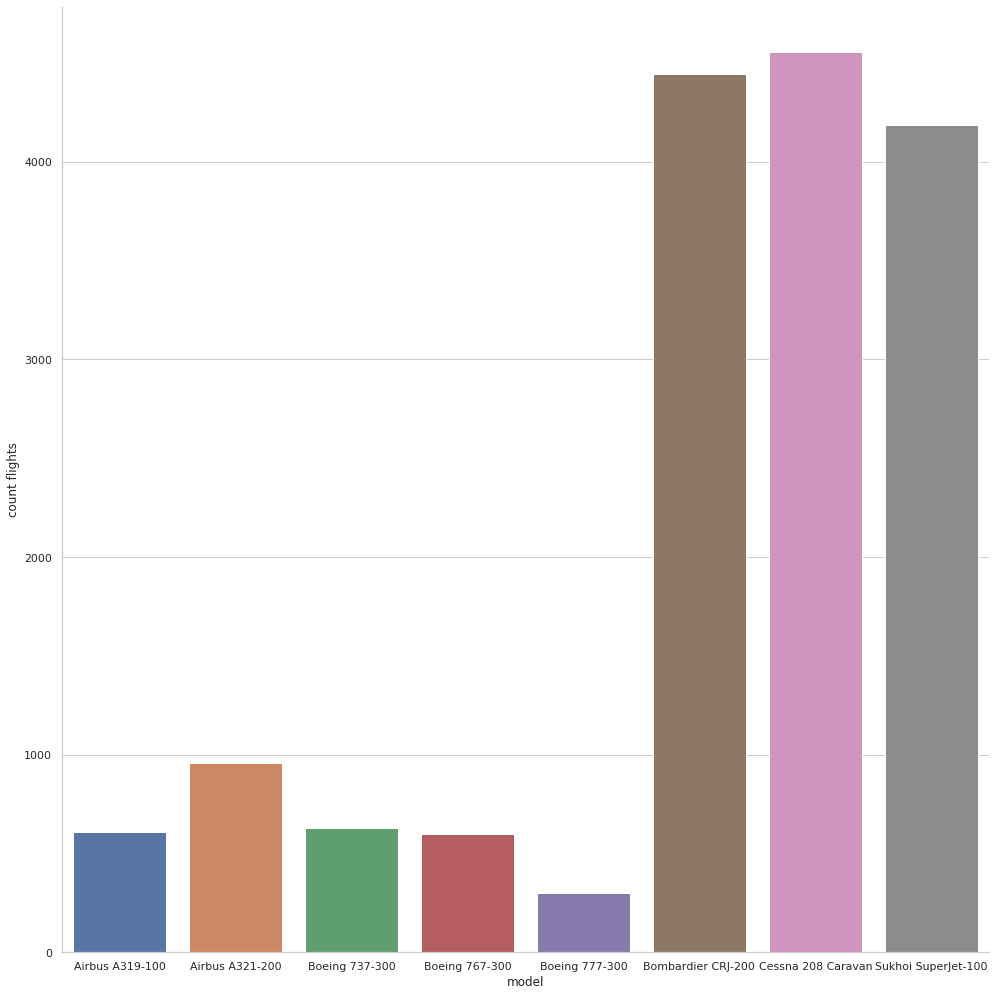

In [6]:
sns.set(style="whitegrid")
graf_1 = sns.catplot(x="model", y="flights_amount", data = model_flights,
                height=14, kind="bar")
graf_1.set_ylabels("count flights")

Из построенного графика видно, что наибольшее количество полетов приходится на 3 типа самолетов Sukhoi SuperJet-100,Cessna 208 Caravan,Bombardier CRJ-200. Вылетов в день на 1 самолет ограничено, из чего можно сделать вывод, что и самой техники этих моделей в разы больше чем остальных


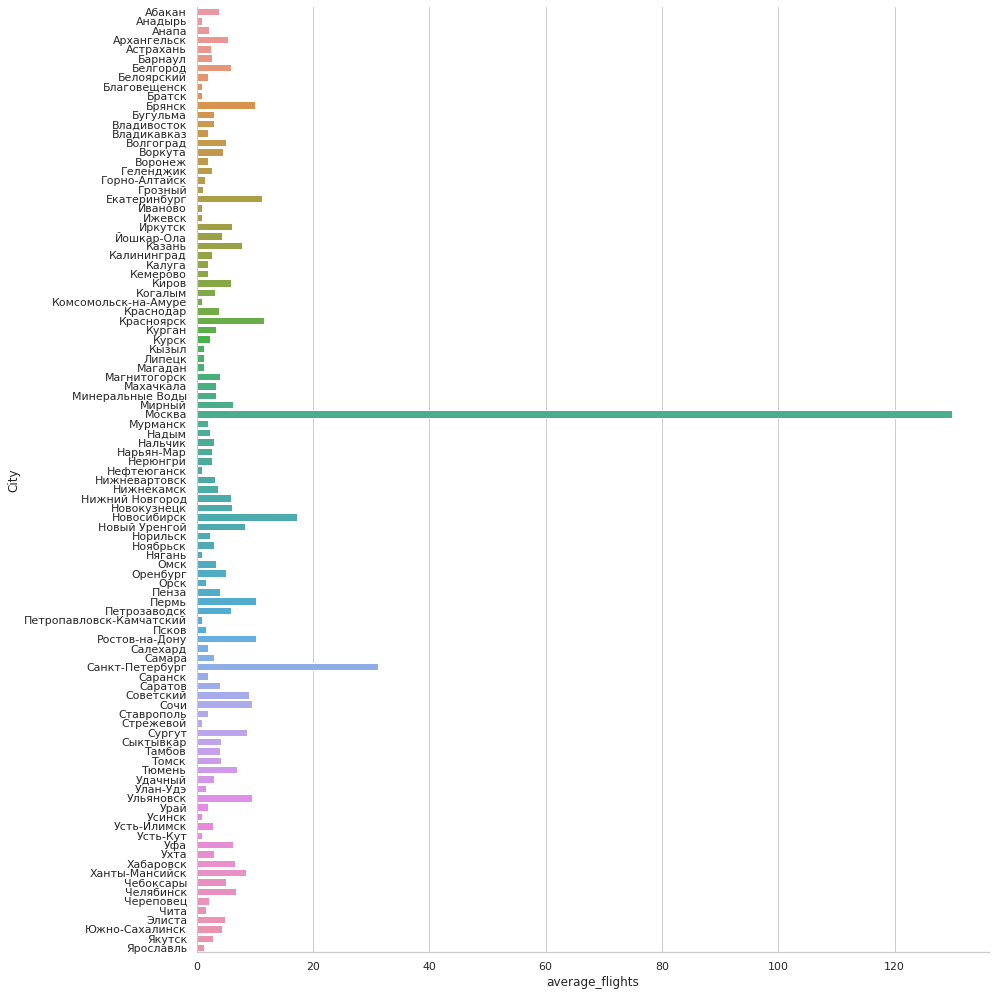

In [7]:
#graf_2 = sns.catplot(x="city", y="average_flights", data = city_flights,
#                height=12, kind="bar")
#graf_2.set_ylabels("average flights")
#1city_flights.plot(y = 'average_flights', kind = 'pie', figsize = (20,20), label = 'city')
#1print(city_flights)
graf_1 = sns.catplot(x="average_flights", y="city", data = city_flights,
                height=14, kind="bar")
graf_1.set_ylabels("City")

Из графиков видно, что присутствуют города со средним количеством прибывающих самолетов в день больше чем в остальных. Данных слишком много для комфортной визуализации какой бы тип графика не выбрать. Для наглядности выделим топ 10 городов по числу прилетов и построим уже для них диаграмму



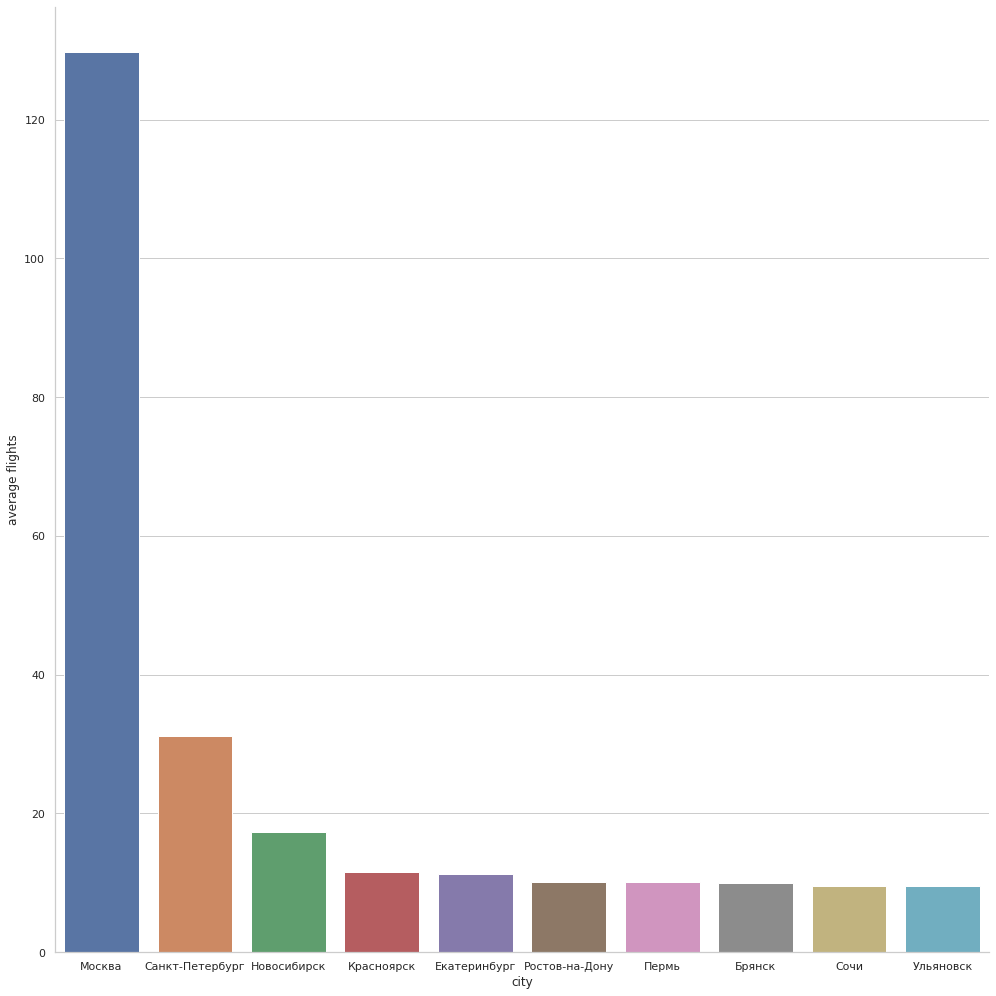

In [8]:
#top_10_cities.plot(y = 'average_flights', kind = 'pie', figsize = (10,10), label = 'city')
#print(top_10_cities)
graf_1 = sns.catplot(x="city", y="average_flights", data = top_10_cities,
                height=14, kind="bar")
graf_1.set_ylabels("average flights")

Наибольшее количество приземлений приходится на столицу России - Москву(более 120). Все города попавшие в топ 10 являются областными центрами



В итоге мы имеем :  
Основные самолеты используемые при авиаперевозках Sukhoi SuperJet-100,Cessna 208 Caravan,Bombardier CRJ-200.  
Наибольшее количество приземлившихся самолетов приходится на областные центры, из которых уже возможно премещение по ближайшим территориям на наземном транспорте.

Перейдем к проверке гипотезы  «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время». Для этого нужно сделать две выборки , с неделями когда нет фестивалей и наоборот.

In [9]:
gip_check

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


In [10]:
gip_check['festival_name'] = gip_check['festival_name'].fillna(1)
gip_check

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,1
3,33,51378,NaN,1
4,34,51492,NaN,1
5,35,51360,NaN,1
6,36,51386,36.0,Видфест
7,37,51670,NaN,1
8,38,51518,NaN,1
9,39,51623,NaN,1


In [11]:
list_week_festival = gip_check['ticket_amount'][gip_check['festival_name'] != 1].tolist()
#list_week_festival

In [12]:
list_week_no_festival = gip_check['ticket_amount'][gip_check['festival_name'] == 1].tolist()
#list_week_no_festival

In [13]:
print('Дисперсия количества билетов проданных во время фестивалей= ',np.var(gip_check.query('festival_name != 1')['ticket_amount']))
print('Дисперсия количества билетов проданных во время отсутствия фестивалей= ',np.var(gip_check.query('festival_name == 1')['ticket_amount']))

Дисперсия количества билетов проданных во время фестивалей=  12998464.888888888
Дисперсия количества билетов проданных во время отсутствия фестивалей=  14694.408163265309


Дисперсии сильно различаются при  при применения в дальнейшем метода st.ttest_ind значение equal_var будет = False

In [14]:
results = st.ttest_ind(list_week_festival, list_week_no_festival,equal_var=False)
alpha = 0.15
print('p-значение:', results.pvalue)
if (results.pvalue < alpha): 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.377432493172683
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу, т.е. количество проданных билетов за недели во время фестивалей и в их отсутствие не различается.


# Вывод

Были построены графики модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов и выявлено следующее:  
1) В основном для авиаперевозок используются самолеты моделей Sukhoi SuperJet-100,Cessna 208 Caravan,Bombardier CRJ-200  
2) Города с наибольшим количеством посадочных рейсов за сентябрь 2018 года (Москва, Санкт-Петербург,Новосибирск, Красноярск, Екатеринбург, Ростов-на-Дону, Пермь, Брянск, Сочи, Ульяновск), это можно объяснить тем ,что все эти города являются областными центрами. Город с самым большим количеством посадок является столица России - Москва.  
3) Была сформулирована и подтверждена теория «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время». Это можно объяснить тем, что все фестивали - это заранее спланированное мероприятие и все желающие их посетить с большой долей вероятности покупают билеты заранее и эти покупки распределяются в течении всего срока от момента объявления о дате фестиваля до его проведения.
